# Covid 19 - Forecast for US and World. 
--------------------------------------------------------
--------------------------------------------------------

- <b>Developer:<i> ```Kiran Musudi``` </i> </b>
- <b>Kaggle</b>:<i> <link>```https://www.kaggle.com/c/covid19-global-forecasting-week-3/overview```</link></i>
- <b>Git</b>:<i>https://github.com/flexykiran/covid19</i> 
- <b>Web:<i> <link> ```www.flexylabs.info ```</link> </i> </b>

### AIM 1: To show the no.of positive cases and death's of the World and USA on the maps.
### AIM 2: To show the projection of no.of positive cases and death's based on the past 10 days.
--------------------------------------------------------
--------------------------------------------------------


In [183]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
%matplotlib inline
import pandas_profiling
import re

# for showing data on the maps/location
import plotly.express as px
import plotly.graph_objects as go

import datetime
from datetime import date, datetime, timedelta

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [184]:
# dictionary for Countries and thier iso3 codes.
country_iso3 = {'Aruba':'ABW','Afghanistan':'AFG','Angola':'AGO','Anguilla':'AIA','Åland Islands':'ALA','Albania':'ALB','Andorra':'AND','United Arab Emirates':'ARE','Argentina':'ARG','Armenia':'ARM','American Samoa':'ASM','Antarctica':'ATA','French Southern Territories':'ATF','Antigua and Barbuda':'ATG','Australia':'AUS','Austria':'AUT','Azerbaijan':'AZE','Burundi':'BDI','Belgium':'BEL','Benin':'BEN','Bonaire, Sint Eustatius and Saba':'BES','Burkina Faso':'BFA','Bangladesh':'BGD','Bulgaria':'BGR','Bahrain':'BHR','Bahamas':'BHS','Bosnia and Herzegovina':'BIH','Saint Barthélemy':'BLM','Belarus':'BLR','Belize':'BLZ','Bermuda':'BMU','Bolivia, Plurinational State of':'BOL','Brazil':'BRA','Barbados':'BRB','Brunei Darussalam':'BRN','Bhutan':'BTN','Bouvet Island':'BVT','Botswana':'BWA','Central African Republic':'CAF','Canada':'CAN','Cocos (Keeling) Islands':'CCK','Switzerland':'CHE','Chile':'CHL','China':'CHN','Côte d’Ivoire':'CIV','Cameroon':'CMR','Congo, the Democratic Republic of the':'COD','Congo':'COG','Cook Islands':'COK','Colombia':'COL','Comoros':'COM','Cape Verde':'CPV','Costa Rica':'CRI','Cuba':'CUB','Curaçao':'CUW','Christmas Island':'CXR','Cayman Islands':'CYM','Cyprus':'CYP','Czech Republic':'CZE','Germany':'DEU','Djibouti':'DJI','Dominica':'DMA','Denmark':'DNK','Dominican Republic':'DOM','Algeria':'DZA','Ecuador':'ECU','Egypt':'EGY','Eritrea':'ERI','Western Sahara':'ESH','Spain':'ESP','Estonia':'EST','Ethiopia':'ETH','Finland':'FIN','Fiji':'FJI','Falkland Islands (Malvinas)':'FLK','France':'FRA','Faroe Islands':'FRO','Micronesia, Federated States of':'FSM','Gabon':'GAB','United Kingdom':'GBR','Georgia':'GEO','Guernsey':'GGY','Ghana':'GHA','Gibraltar':'GIB','Guinea':'GIN','Guadeloupe':'GLP','Gambia':'GMB','Guinea-Bissau':'GNB','Equatorial Guinea':'GNQ','Greece':'GRC','Grenada':'GRD','Greenland':'GRL','Guatemala':'GTM','French Guiana':'GUF','Guam':'GUM','Guyana':'GUY','Hong Kong':'HKG','Heard Island and McDonald Islands':'HMD','Honduras':'HND','Croatia':'HRV','Haiti':'HTI','Hungary':'HUN','Indonesia':'IDN','Isle of Man':'IMN','India':'IND','British Indian Ocean Territory':'IOT','Ireland':'IRL','Iran, Islamic Republic of':'IRN','Iraq':'IRQ','Iceland':'ISL','Israel':'ISR','Italy':'ITA','Jamaica':'JAM','Jersey':'JEY','Jordan':'JOR','Japan':'JPN','Kazakhstan':'KAZ','Kenya':'KEN','Kyrgyzstan':'KGZ','Cambodia':'KHM','Kiribati':'KIR','Saint Kitts and Nevis':'KNA','Korea, Republic of':'KOR','Kuwait':'KWT','Lao People’s Democratic Republic':'LAO','Lebanon':'LBN','Liberia':'LBR','Libya':'LBY','Saint Lucia':'LCA','Liechtenstein':'LIE','Sri Lanka':'LKA','Lesotho':'LSO','Lithuania':'LTU','Luxembourg':'LUX','Latvia':'LVA','Macao':'MAC','Saint Martin (French part)':'MAF','Morocco':'MAR','Monaco':'MCO','Moldova, Republic of':'MDA','Madagascar':'MDG','Maldives':'MDV','Mexico':'MEX','Marshall Islands':'MHL','Macedonia, the former Yugoslav Republic of':'MKD','Mali':'MLI','Malta':'MLT','Myanmar':'MMR','Montenegro':'MNE','Mongolia':'MNG','Northern Mariana Islands':'MNP','Mozambique':'MOZ','Mauritania':'MRT','Montserrat':'MSR','Martinique':'MTQ','Mauritius':'MUS','Malawi':'MWI','Malaysia':'MYS','Mayotte':'MYT','Namibia':'NAM','New Caledonia':'NCL','Niger':'NER','Norfolk Island':'NFK','Nigeria':'NGA','Nicaragua':'NIC','Niue':'NIU','Netherlands':'NLD','Norway':'NOR','Nepal':'NPL','Nauru':'NRU','New Zealand':'NZL','Oman':'OMN','Pakistan':'PAK','Panama':'PAN','Pitcairn':'PCN','Peru':'PER','Philippines':'PHL','Palau':'PLW','Papua New Guinea':'PNG','Poland':'POL','Puerto Rico':'PRI','Korea, Democratic People’s Republic of':'PRK','Portugal':'PRT','Paraguay':'PRY','Palestine, State of':'PSE','French Polynesia':'PYF','Qatar':'QAT','Réunion':'REU','Romania':'ROU','Russian Federation':'RUS','Rwanda':'RWA','Saudi Arabia':'SAU','Sudan':'SDN','Senegal':'SEN','Singapore':'SGP','South Georgia and the South Sandwich Islands':'SGS','Saint Helena, Ascension and Tristan da Cunha':'SHN','Svalbard and Jan Mayen':'SJM','Solomon Islands':'SLB','Sierra Leone':'SLE','El Salvador':'SLV','San Marino':'SMR','Somalia':'SOM','Saint Pierre and Miquelon':'SPM','Serbia':'SRB','South Sudan':'SSD','Sao Tome and Principe':'STP','Suriname':'SUR','Slovakia':'SVK','Slovenia':'SVN','Sweden':'SWE','Swaziland':'SWZ','Sint Maarten (Dutch part)':'SXM','Seychelles':'SYC','Syrian Arab Republic':'SYR','Turks and Caicos Islands':'TCA','Chad':'TCD','Togo':'TGO','Thailand':'THA','Tajikistan':'TJK','Tokelau':'TKL','Turkmenistan':'TKM','Timor-Leste':'TLS','Tonga':'TON','Trinidad and Tobago':'TTO','Tunisia':'TUN','Turkey':'TUR','Tuvalu':'TUV','Taiwan, Province of China':'TWN','Tanzania, United Republic of':'TZA','Uganda':'UGA','Ukraine':'UKR','United States Minor Outlying Islands':'UMI','Uruguay':'URY','United States':'USA','Uzbekistan':'UZB','Holy See (Vatican City State)':'VAT','Saint Vincent and the Grenadines':'VCT','Venezuela, Bolivarian Republic of':'VEN','Virgin Islands, British':'VGB','Virgin Islands, U.S.':'VIR','Viet Nam':'VNM','Vanuatu':'VUT','Wallis and Futuna':'WLF','Samoa':'WSM','Yemen':'YEM','South Africa':'ZAF','Zambia':'ZMB','Zimbabwe':'ZWE'}

# dictionary for USA states and thier state codes.
state_codes = {'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY','District of Columbia':'DC','Marshall Islands':'MH','Armed Forces Africa':'AE','Armed Forces Americas':'AA','Armed Forces Canada':'AE','Armed Forces Europe':'AE','Armed Forces Middle East':'AE','Armed Forces Pacific':'AP'}

# dictionary for month and month numbers.
month_codes = {'1':'JAN','2':'FEB','3':'MAR','4':'APR','5':'MAY','6':'JUN','7':'JUL','8':'AUG','9':'SEP','10':'OCT','11':'NOV','12':'DEC'}

def getISO3CountryCode(country):
    return country_iso3.get(country)

def getUSAStateCode(state):
    return state_codes.get(state)

def find_between(s, start, end):
    return (s.split(start))[1].split(end)[0]

def getDateColumn(col):
    month_num = col.split('_')
    month_num = find_between(col, '_', '_')
    print(month_num)
    month = month_codes.get(month_num[0])
    print(month)
    col = col.replace('_'+month_num+'_', month)
    return col

def getFormattedDate(col):
    month_num = col.split('_')
    mth = month_num[0] if len(month_num[0]) == 2 else '0'+month_num[0]
    dt = month_num[1] if len(month_num[1]) == 2 else '0'+month_num[1]
    yr = '2020'
    return  mth + '-' + dt + '-' + yr

# list of forecast dates:
forecast_dates = []
start_date = date(2020, 3, 10) # start date
end_date = date(2020, 4, 15)   # end date

# getForecastDates list:
def getForecastDates1(start_date, end_date):
    delta = end_date - start_date  # as timedelta
    for i in range(delta.days + 1):
        day = start_date + timedelta(days=i)
        forecast_dates.append(day.strftime("%m-%d-%Y"))
    return forecast_dates


# Variable Declarations:
STATE_CODE = 'State_Code'
PROVINCE_OR_STATE = 'Province_State'
COUNTRY_REGION = 'Country_Region'
COUNTRY_CODE = 'Country_Code'
FORWARD_SLASH = "/"
UNDERSCORE = "_"
RANGE_OF_DAYS = -10
DATE_FORMAT = "%m-%d-%Y"

from datetime import datetime
today = datetime.now()
start = today + timedelta(days=RANGE_OF_DAYS)
end = today + timedelta(days=abs(RANGE_OF_DAYS))


# getForecastDates list:
def getForecastDates(start_date):
    for i in range(abs(RANGE_OF_DAYS)):
        day = start_date + timedelta(days=i+1)
        forecast_dates.append(day.strftime(DATE_FORMAT))
    return forecast_dates



In [185]:
def showMapStats(location_codes, location_names, case_counts, location_mode, last_date, geo_scope, state):
    fig = go.Figure(data=go.Choropleth(
        locations = location_codes,
        z = case_counts,
        text = location_names,
        locationmode = location_mode,
        colorscale = 'ice',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = 'No.of Confirmed Cases',
    ))

    fig.update_layout(
        title_text='COVID 19 '+state+' cases on ' + last_date,    
        geo_scope=geo_scope,
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="www.flexylabs.info">\
                flexylabs.info</a>',
            showarrow = False
        )]
    )

    fig.show()


In [186]:
# import the CSV files for time_series of covid19 confirmed cases in US states:
us_confirmed = pd.read_csv('Z://$STUDY/IIIT/Kaggle/COVID-19-master/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',encoding='ISO-8859-1',low_memory=False)

# renaming the columns - replacing the '/' with '_'
us_confirmed.columns = us_confirmed.columns.str.replace(FORWARD_SLASH, UNDERSCORE)

# get the last column, which is the latest date.
us_confirmed_last_column = us_confirmed.columns[-1]

# extract a mini database with nessasary fields.
us_confirmed_mini = us_confirmed[[PROVINCE_OR_STATE, us_confirmed_last_column]]

# Aggrigate all the state wise cases
us_confirmed_mini = us_confirmed_mini.groupby(PROVINCE_OR_STATE).sum()[[us_confirmed_last_column]]

print(us_confirmed_mini.index)
Province_State = us_confirmed_mini.index
us_confirmed_mini[STATE_CODE] = [getUSAStateCode(x) for x in Province_State]
us_confirmed_mini[PROVINCE_OR_STATE] = [x for x in Province_State]

# Drop unmapped rows for state_codes
indexNames = us_confirmed_mini[us_confirmed_mini[STATE_CODE].isna()].index
# print(indexNames)
# Delete these row indexes from dataFrame
us_confirmed_mini.drop(indexNames , inplace=True)

us_confirmed_mini.head()

Index(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='Province_State')


,4_1_20,State_Code,Province_State
Province_State,,,
Alabama,1060,AL,Alabama
Alaska,132,AK,Alaska
Arizona,1530,AZ,Arizona
Arkansas,584,AR,Arkansas
California,9399,CA,California


In [187]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3_23_20,3_24_20,3_25_20,3_26_20,3_27_20,3_28_20,3_29_20,3_30_20,3_31_20,4_1_20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,29,32,37,45,51,55,56,58,69,77
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,0,0,2,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,31,39,51,64,79,100,127,174,239,286
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,7,17,17,17,19,22,0,0,30,30


In [188]:
us_confirmed_filtered = us_confirmed.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Province_State', 'Lat','Long_','Combined_Key'], axis=1)
us_confirmed_filtered.head()



,Country_Region,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,1_29_20,1_30_20,...,3_23_20,3_24_20,3_25_20,3_26_20,3_27_20,3_28_20,3_29_20,3_30_20,3_31_20,4_1_20
0,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,US,0,0,0,0,0,0,0,0,0,...,29,32,37,45,51,55,56,58,69,77
2,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6
3,US,0,0,0,0,0,0,0,0,0,...,31,39,51,64,79,100,127,174,239,286
4,US,0,0,0,0,0,0,0,0,0,...,7,17,17,17,19,22,0,0,30,30


In [189]:
us_confirmed_filtered.loc["United States"] = us_confirmed_filtered.sum()
us_confirmed_filtered[-1:]['Country_Region'] = 'United States'
us_confirmed_total = us_confirmed_filtered[-1:]

us_confirmed_total

,Country_Region,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,1_29_20,1_30_20,...,3_23_20,3_24_20,3_25_20,3_26_20,3_27_20,3_28_20,3_29_20,3_30_20,3_31_20,4_1_20
United States,United States,1,1,2,2,5,5,5,5,5,...,43663,53736,65778,83836,101657,121478,140886,161807,188172,213362


In [190]:
showMapStats(us_confirmed_mini[STATE_CODE], us_confirmed_mini[PROVINCE_OR_STATE], us_confirmed_mini[us_confirmed_last_column],
             'USA-states', us_confirmed_last_column, 'usa', 'Confirmed')

In [191]:
# import the CSV files for time_series of covid19 confirmed cases in US states:
global_confirmed_new = pd.read_csv('Z://$STUDY/IIIT/Kaggle/COVID-19-master/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',encoding='ISO-8859-1',low_memory=False)


# renaming the columns - replacing the '/' with '_'
global_confirmed_new.columns = global_confirmed_new.columns.str.replace(FORWARD_SLASH, UNDERSCORE)

# get the last column, which is the latest date.
global_confirmed_last_column = global_confirmed_new.columns[-1]

# Aggrigate all the state wise cases
global_confirmed = global_confirmed_new.groupby(COUNTRY_REGION).sum()

# dropping Province_State, Lat and Long columns:
global_confirmed = global_confirmed.drop(['Lat', 'Long'], axis=1)
Country_Name = global_confirmed.index
global_confirmed[COUNTRY_REGION] = [x for x in Country_Name]

# concatinating the USA record in the global_confirmed dataset
frame = [global_confirmed, us_confirmed_total]
global_confirmed = pd.concat(frame, axis=0, join='inner', ignore_index=False, keys=None)

# extract a mini database with nessasary fields.
global_confirmed_mini = global_confirmed[[COUNTRY_REGION, global_confirmed_last_column]]

Country_Name = global_confirmed_mini.index

global_confirmed_mini[COUNTRY_CODE] = [getISO3CountryCode(x) for x in Country_Name]
global_confirmed_mini[COUNTRY_REGION] = [x for x in Country_Name]

# Drop unmapped rows for country_code
indexNames = global_confirmed_mini[global_confirmed_mini[COUNTRY_CODE].isna()].index

# Delete these row indexes from dataFrame
global_confirmed_mini.drop(indexNames , inplace=True)

global_confirmed_mini.tail(20)

,Country_Region,4_1_20,Country_Code
Sri Lanka,Sri Lanka,146,LKA
Sudan,Sudan,7,SDN
Suriname,Suriname,10,SUR
Sweden,Sweden,4947,SWE
Switzerland,Switzerland,17768,CHE
Thailand,Thailand,1771,THA
Timor-Leste,Timor-Leste,1,TLS
Togo,Togo,36,TGO
Trinidad and Tobago,Trinidad and Tobago,90,TTO
Tunisia,Tunisia,423,TUN


In [192]:
showMapStats(global_confirmed_mini[COUNTRY_CODE], global_confirmed_mini[COUNTRY_REGION], global_confirmed_mini[global_confirmed_last_column],
             None, global_confirmed_last_column, None, 'Confirmed')

In [193]:
# Ignoring USA data
global_confirmed_mini = global_confirmed_mini[:-1]

showMapStats(global_confirmed_mini[COUNTRY_CODE], global_confirmed_mini[COUNTRY_REGION], global_confirmed_mini[global_confirmed_last_column],
             None, global_confirmed_last_column, None, 'Confirmed')

#### Merging Confirmed and Death cases for last 10 days. (RANGE_OF_DAYS)
STATE_CODE = 'State_Code'
PROVINCE_OR_STATE = 'Province_State'
COUNTRY_REGION = 'Country_Region'
COUNTRY_CODE = 'Country_Code'

In [194]:
# get past RANGE_OF_DAYS records for each country/region
df_countries = global_confirmed[[COUNTRY_REGION]]
df_dates = global_confirmed[global_confirmed.columns[1:-1]]
df_dates = df_dates.rename(columns=lambda x: getFormattedDate(x))
df_dates = df_dates[df_dates.columns[RANGE_OF_DAYS:]]
frames = [df_countries, df_dates]

global_confirmed = pd.concat(frames, axis=1, join='outer', ignore_index=False, keys=None)
global_confirmed = global_confirmed[:-1]
global_confirmed.head(20)



,Country_Region,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,04-01-2020
Afghanistan,Afghanistan,40,74,84,94,110,110,120,170,174,237
Albania,Albania,104,123,146,174,186,197,212,223,243,259
Algeria,Algeria,230,264,302,367,409,454,511,584,716,847
Andorra,Andorra,133,164,188,224,267,308,334,370,376,390
Angola,Angola,3,3,3,4,4,5,7,7,7,8
Antigua and Barbuda,Antigua and Barbuda,3,3,3,7,7,7,7,7,7,7
Argentina,Argentina,301,387,387,502,589,690,745,820,1054,1054
Armenia,Armenia,235,249,265,290,329,407,424,482,532,571
Australia,Australia,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862
Austria,Austria,4474,5283,5588,6909,7657,8271,8788,9618,10180,10711


In [195]:
global_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  180 non-null    object
 1   03-23-2020      180 non-null    int64 
 2   03-24-2020      180 non-null    int64 
 3   03-25-2020      180 non-null    int64 
 4   03-26-2020      180 non-null    int64 
 5   03-27-2020      180 non-null    int64 
 6   03-28-2020      180 non-null    int64 
 7   03-29-2020      180 non-null    int64 
 8   03-30-2020      180 non-null    int64 
 9   03-31-2020      180 non-null    int64 
 10  04-01-2020      180 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 16.9+ KB


In [196]:
# machine learning
import datetime as dt

# drop rows with NaN values
global_confirmed.dropna(inplace=True)

countries = global_confirmed[COUNTRY_REGION].tolist()
temp_df = pd.DataFrame()    

count = 0
for country in countries:
    print("-----------START--------------", country)
    # prepare data for the model
    record = global_confirmed[global_confirmed[COUNTRY_REGION] == country].drop([COUNTRY_REGION], axis=1)
    record = record.T
    record.reset_index(inplace=True)
    record.columns = ['Time_Series', 'Confirmed_Cases']
    record_copy = record.copy()
    # convert the date from string format to numerical/float inorder to feed it to the algorithm.
    record['Time_Series'] = pd.to_datetime(record['Time_Series'])
    record['Time_Series'] = record['Time_Series'].map(dt.datetime.toordinal)
    
    X = record.iloc[:,0]   # date column
    y = record.iloc[:,-1]  # cases column
    
    linearModel = LinearRegression()
    linearModel.fit(np.array(X).reshape(-1,1), y)
    
    latest_date = X.iloc[-1]
    
    
    # predict future population with respective year and add back to current record
    for day in range(latest_date+1, (latest_date+1 + abs(RANGE_OF_DAYS))):
        
        future_confirmed_cases = round(linearModel.predict(np.array([day], dtype=np.int32).reshape(-1,1))[0])
        row = pd.DataFrame([[datetime.fromordinal(day).strftime(DATE_FORMAT),future_confirmed_cases]], columns=['Time_Series','Confirmed_Cases'])
        record_copy = record_copy.append(row, ignore_index=True)
        
    # change narrow dataframe back to a wide one
    record_copy = record_copy.T
    new_header = record_copy.iloc[0]
    record_copy = record_copy[1:]
    record_copy.columns = new_header
    record_copy.columns.name = None
    record_copy.index = [country]  
    temp_df = pd.concat([temp_df, record_copy])
    #temp_df = pd.concat([temp_df, record], axis=1, join='outer')
    #break


# set new dataframe instead of the original
global_confirmed_future = temp_df
#global_confirmed_future.reset_index(inplace=True)
global_confirmed_future = global_confirmed_future.astype(str) 
global_confirmed_future.to_csv('future_confirmed_cases_prediction.csv')
print("-----------DONE--------------")
global_confirmed_future.head()


-----------START-------------- Afghanistan
-----------START-------------- Albania
-----------START-------------- Algeria
-----------START-------------- Andorra
-----------START-------------- Angola
-----------START-------------- Antigua and Barbuda
-----------START-------------- Argentina
-----------START-------------- Armenia
-----------START-------------- Australia
-----------START-------------- Austria
-----------START-------------- Azerbaijan
-----------START-------------- Bahamas
-----------START-------------- Bahrain
-----------START-------------- Bangladesh
-----------START-------------- Barbados
-----------START-------------- Belarus
-----------START-------------- Belgium
-----------START-------------- Belize
-----------START-------------- Benin
-----------START-------------- Bhutan
-----------START-------------- Bolivia
-----------START-------------- Bosnia and Herzegovina
-----------START-------------- Botswana
-----------START-------------- Brazil
-----------START-----------

,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,04-09-2020,04-10-2020,04-11-2020
Afghanistan,40.0,74.0,84.0,94.0,110.0,110.0,120.0,170.0,174.0,237.0,221.0,239.0,257.0,275.0,293.0,311.0,329.0,347.0,365.0,383.0
Albania,104.0,123.0,146.0,174.0,186.0,197.0,212.0,223.0,243.0,259.0,278.0,295.0,311.0,328.0,345.0,361.0,378.0,395.0,411.0,428.0
Algeria,230.0,264.0,302.0,367.0,409.0,454.0,511.0,584.0,716.0,847.0,822.0,886.0,950.0,1015.0,1079.0,1143.0,1207.0,1272.0,1336.0,1400.0
Andorra,133.0,164.0,188.0,224.0,267.0,308.0,334.0,370.0,376.0,390.0,445.0,475.0,506.0,537.0,568.0,599.0,629.0,660.0,691.0,722.0
Angola,3.0,3.0,3.0,4.0,4.0,5.0,7.0,7.0,7.0,8.0,9.0,9.0,10.0,10.0,11.0,12.0,12.0,13.0,14.0,14.0


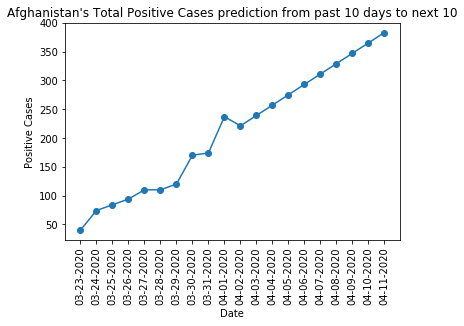

In [197]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

def getRecordOfCountry(country, df):
    index = -1
    for i in df.index:
        if i == country:
            index = index + 1
            break
        else:
            index = index + 1
    
                
    return df.iloc[index]

def scatterPlotGCFuture(record, title, xlabel, ylabel):
    dates = record.index[-20:]
    confirmedNumbers = record.tolist()[-20:]
    confirmedNumbers = np.array(confirmedNumbers, dtype=np.float32)
    

    plt.scatter(dates, confirmedNumbers)  # plot scatter plot
    plt.plot(dates, confirmedNumbers) # line to connect the points)
    plt.xticks(rotation='vertical') # rotate x axis labels text to vertical inorder for it to show up and not cluster together
    plt.title(record.name + title) # set graph title
    plt.xlabel(xlabel) # set y axis label
    plt.ylabel(ylabel) # set y axis label
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # turn of scientific notations
    plt.show() # display graph

    
scatterPlotGCFuture(getRecordOfCountry('Afghanistan', global_confirmed_future),
                    '\'s Total Positive Cases prediction from past '+ str(abs(RANGE_OF_DAYS)) +' days to next '+ str(abs(RANGE_OF_DAYS)), 
                    'Date', 
                    'Positive Cases')

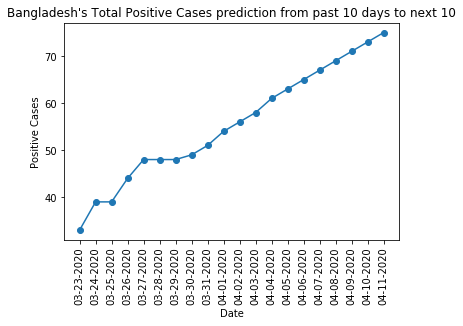

In [198]:
scatterPlotGCFuture(getRecordOfCountry('Bangladesh', global_confirmed_future),  
                    '\'s Total Positive Cases prediction from past '+ str(abs(RANGE_OF_DAYS)) +' days to next '+ str(abs(RANGE_OF_DAYS)), 
                    'Date', 
                    'Positive Cases')

In [199]:
import matplotlib.pyplot as plt

def scatterPlotCompare(record1, record2, title, xlabel, ylabel):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    dates1 = record1.index[-20:]
    confirmedNumbers1 = record1.tolist()[-20:]
    confirmedNumbers1 = np.array(confirmedNumbers1, dtype=np.float32)

    dates2 = record2.index[-20:]
    confirmedNumbers2 = record2.tolist()[-20:]
    confirmedNumbers2 = np.array(confirmedNumbers2, dtype=np.float32)

    ax1.scatter(dates1, confirmedNumbers1, s=10, c='b', label=record1.name)
    ax1.scatter(dates2, confirmedNumbers2, s=10, c='r', label=record2.name)
    plt.legend(loc='upper left');
    plt.xticks(rotation='vertical') # rotate x axis labels text to vertical inorder for it to show up and not cluster together
    plt.title(record1.name +' vs '+ record2.name +' '+ title) # set graph title
    plt.xlabel(xlabel) # set y axis label
    plt.ylabel(ylabel) # set y axis label
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # turn of scientific notations
    plt.show() # display graph



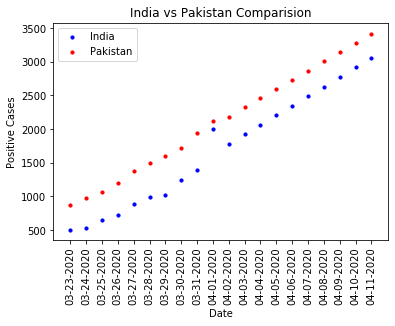

In [202]:
scatterPlotCompare(getRecordOfCountry('India', global_confirmed_future), 
                   getRecordOfCountry('Pakistan', global_confirmed_future), 
                   'Comparision', 'Date', 'Positive Cases')

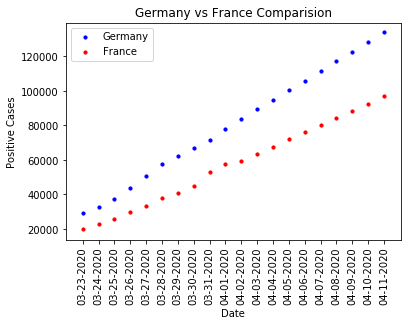

In [203]:
scatterPlotCompare(getRecordOfCountry('Germany', global_confirmed_future), 
                   getRecordOfCountry('France', global_confirmed_future), 
                   'Comparision', 'Date', 'Positive Cases')

In [204]:
# import the CSV files for time_series of covid19 deaths cases in world:
global_death_new = pd.read_csv('Z://$STUDY/IIIT/Kaggle/COVID-19-master/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',encoding='ISO-8859-1',low_memory=False)

# renaming the columns - replacing the '/' with '_'
global_death_new.columns = global_death_new.columns.str.replace(FORWARD_SLASH, UNDERSCORE)

# get the last column, which is the latest date.
global_death_last_column = global_death_new.columns[-1]

# Aggrigate all the state wise cases
global_death = global_death_new.groupby(COUNTRY_REGION).sum()

# dropping Province_State, Lat and Long columns:
global_death = global_death.drop(['Lat', 'Long'], axis=1)
Country_Name = global_death.index
global_death[COUNTRY_REGION] = [x for x in Country_Name]


# extract a mini database with nessasary fields.
global_death_mini = global_death[[COUNTRY_REGION, global_death_last_column]]

Country_Name = global_death_mini.index
global_death_mini[COUNTRY_CODE] = [getISO3CountryCode(x) for x in Country_Name]
global_death_mini[COUNTRY_REGION] = [x for x in Country_Name]

# Drop unmapped rows for country_code
indexNames = global_death_mini[global_death_mini[COUNTRY_CODE].isna()].index

# Delete these row indexes from dataFrame
global_death_mini.drop(indexNames , inplace=True)

global_death_mini.head(20)

,Country_Region,4_1_20,Country_Code
Country_Region,,,
Afghanistan,Afghanistan,4,AFG
Albania,Albania,15,ALB
Algeria,Algeria,58,DZA
Andorra,Andorra,14,AND
Angola,Angola,2,AGO
Antigua and Barbuda,Antigua and Barbuda,0,ATG
Argentina,Argentina,28,ARG
Armenia,Armenia,4,ARM
Australia,Australia,20,AUS


In [205]:
showMapStats(global_death_mini[COUNTRY_CODE], global_death_mini[COUNTRY_REGION], global_death_mini[global_death_last_column],
             None, global_death_last_column, None, 'Death')

In [206]:
# get past RANGE_OF_DAYS records for each country/region
df_countries = global_death[[COUNTRY_REGION]]
df_dates = global_death[global_death.columns[1:-1]]
df_dates = df_dates.rename(columns=lambda x: getFormattedDate(x))
df_dates = df_dates[df_dates.columns[RANGE_OF_DAYS:]]
frames = [df_countries, df_dates]

global_death = pd.concat(frames, axis=1, join='outer', ignore_index=False, keys=None)
global_death.head(20)

,Country_Region,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,04-01-2020
Country_Region,,,,,,,,,,,
Afghanistan,Afghanistan,1,1,2,4,4,4,4,4,4,4
Albania,Albania,4,5,5,6,8,10,10,11,15,15
Algeria,Algeria,17,19,21,25,26,29,31,35,44,58
Andorra,Andorra,1,1,1,3,3,3,6,8,12,14
Angola,Angola,0,0,0,0,0,0,2,2,2,2
Antigua and Barbuda,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0
Argentina,Argentina,4,6,8,9,13,18,19,23,27,28
Armenia,Armenia,0,0,0,1,1,1,3,3,3,4
Australia,Australia,7,8,8,13,13,14,16,17,18,20


In [207]:
# drop rows with NaN values
global_death.dropna(inplace=True)

countries = global_death[COUNTRY_REGION].tolist()
temp_df = pd.DataFrame()    

count = 0
for country in countries:
    print("-----------START--------------", country)
    # prepare data for the model
    record = global_death[global_death[COUNTRY_REGION] == country].drop([COUNTRY_REGION], axis=1)
    record = record.T
    record.reset_index(inplace=True)
    record.columns = ['Time_Series', 'death_Cases']
    record_copy = record.copy()
    # convert the date from string format to numerical/float inorder to feed it to the algorithm.
    record['Time_Series'] = pd.to_datetime(record['Time_Series'])
    record['Time_Series'] = record['Time_Series'].map(dt.datetime.toordinal)
    
    X = record.iloc[:,0]   # date column
    y = record.iloc[:,-1]  # cases column
    
    linearModel = LinearRegression()
    linearModel.fit(np.array(X).reshape(-1,1), y)
    
    latest_date = X.iloc[-1]
    
    
    # predict future population with respective year and add back to current record
    for day in range(latest_date+1, (latest_date+1 + abs(RANGE_OF_DAYS))):
        
        future_death_cases = round(linearModel.predict(np.array([day], dtype=np.int32).reshape(-1,1))[0])
        row = pd.DataFrame([[datetime.fromordinal(day).strftime(DATE_FORMAT),future_death_cases]], columns=['Time_Series','death_Cases'])
        record_copy = record_copy.append(row, ignore_index=True)
        
    # change narrow dataframe back to a wide one
    record_copy = record_copy.T
    new_header = record_copy.iloc[0]
    record_copy = record_copy[1:]
    record_copy.columns = new_header
    record_copy.columns.name = None
    record_copy.index = [country]  
    temp_df = pd.concat([temp_df, record_copy])
    #temp_df = pd.concat([temp_df, record], axis=1, join='outer')
    #break


# set new dataframe instead of the original
global_death_future = temp_df
#global_death_future.reset_index(inplace=True)
global_death_future = global_death_future.astype(str) 
global_death_future.to_csv('future_death_cases_prediction.csv')
print("-----------DONE--------------")
global_death_future.head()


-----------START-------------- Afghanistan
-----------START-------------- Albania
-----------START-------------- Algeria
-----------START-------------- Andorra
-----------START-------------- Angola
-----------START-------------- Antigua and Barbuda
-----------START-------------- Argentina
-----------START-------------- Armenia
-----------START-------------- Australia
-----------START-------------- Austria
-----------START-------------- Azerbaijan
-----------START-------------- Bahamas
-----------START-------------- Bahrain
-----------START-------------- Bangladesh
-----------START-------------- Barbados
-----------START-------------- Belarus
-----------START-------------- Belgium
-----------START-------------- Belize
-----------START-------------- Benin
-----------START-------------- Bhutan
-----------START-------------- Bolivia
-----------START-------------- Bosnia and Herzegovina
-----------START-------------- Botswana
-----------START-------------- Brazil
-----------START-----------

,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,04-07-2020,04-08-2020,04-09-2020,04-10-2020,04-11-2020
Afghanistan,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,8.0,8.0,8.0
Albania,4.0,5.0,5.0,6.0,8.0,10.0,10.0,11.0,15.0,15.0,16.0,17.0,19.0,20.0,21.0,22.0,24.0,25.0,26.0,28.0
Algeria,17.0,19.0,21.0,25.0,26.0,29.0,31.0,35.0,44.0,58.0,52.0,56.0,59.0,63.0,67.0,71.0,75.0,79.0,82.0,86.0
Andorra,1.0,1.0,1.0,3.0,3.0,3.0,6.0,8.0,12.0,14.0,13.0,15.0,16.0,17.0,19.0,20.0,22.0,23.0,25.0,26.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0


### Death Cases of a country (Afghanistan)

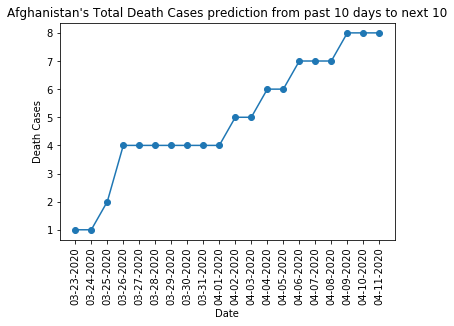

In [208]:
scatterPlotGCFuture(getRecordOfCountry('Afghanistan', global_death_future),  
                    '\'s Total Death Cases prediction from past '+ str(abs(RANGE_OF_DAYS)) +' days to next '+ str(abs(RANGE_OF_DAYS)), 
                    'Date', 
                    'Death Cases')

### Compare Death Cases of a Two Counties (Germany Vs France)

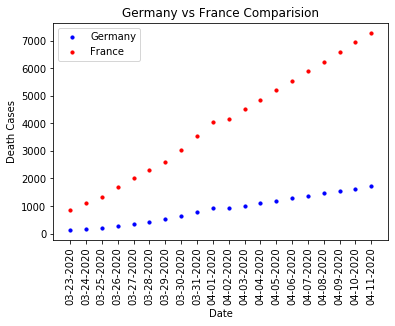

In [209]:
scatterPlotCompare(getRecordOfCountry('Germany', global_death_future), 
                   getRecordOfCountry('France', global_death_future), 
                   'Comparision', 'Date', 'Death Cases')

### Compare Positive Cases vs Death of a Country (Italy)

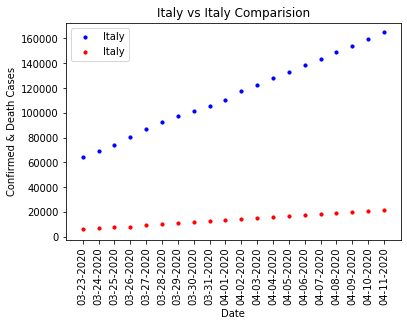

In [210]:
scatterPlotCompare(getRecordOfCountry('Italy', global_confirmed_future), 
                   getRecordOfCountry('Italy', global_death_future), 
                   'Comparision', 'Date', 'Confirmed & Death Cases')